# Supervised Learning

## 2.1 Classification and Regression
There are two types of supervised machine learning problems, called classification and regression. Classification aims to predict a class label from a predefined list of possibilities
e.g. email as junk/important (binary classification). Iris to a species (multigroup classification). 

For Regression tasks, the goal is to predict a floating point number. e.g. predicting a person's annual income from their education, their age, and where they live. The best way to determine 
wether a between a regression or classification is to ask whether there is some kind of continuity in the output. For example the iris example is classification as there is no continous 
scale between species wheras there is in predicting financial income. 

## 2.2 Generalization, Overfitting, and Underfitting
Generalization is where the rules on the training set are just as applicable to new data. When training a model on a training set it is possible to make the model too complex and specific
to the trianing data. So much so that it makes more accurate predictions on the training data than the available. This is known as overfitting. When you model is very simple and innacurate 
on both the training and the test data it is known as underfitting. 

## 2.3 Supervised Machine Learning Algorithms
An example of a synthetic two-class classification dataset is the forge dataset, which has two featrues.

X.shape: (26, 2)


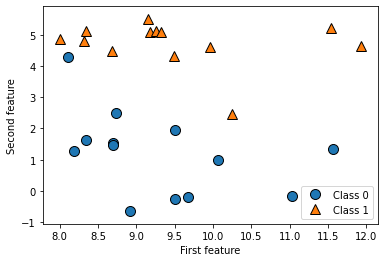

In [2]:
import mglearn
import matplotlib.pyplot as plt
# generate dataset 
X, y = mglearn.datasets.make_forge()
# plot dataset
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape:", X.shape)

As you can see from X.shape, this dataset consists of 26 data points with 2 featurs. To ilustrate regression the wave dataset has a single input 
feature and a continuous target variable or response that we want to model. 

Text(0, 0.5, 'Target')

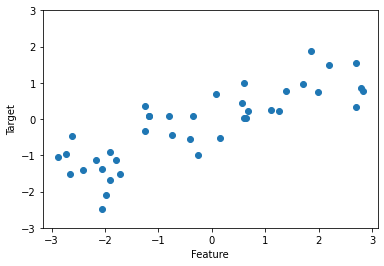

In [7]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

This is a very low dimensional dataset because it is easy to visualize. Wisconsin Breast Cancer dataset is available in the scikit-learn module. 

In [8]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n", cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


The dataset consists of 569 data points, with 30 features each

In [9]:
print("Shape of cancer data:", cancer.data.shape)

Shape of cancer data: (569, 30)


In [10]:
import numpy as np
print("Sample counts per class:\n", 
        {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

Sample counts per class:
 {'malignant': 212, 'benign': 357}


To get a meaning of each features we can look at feature names.

In [11]:
print("Feature names:\n", cancer.feature_names)

Feature names:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


.  
.  
.  
.  
### Boston Housing dataset

In [12]:
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape:", boston.data.shape)

Data shape: (506, 13)


.  
.  
.  
.  
.  
# K-Nearest Neighbours 
K-NN is the simplest Ml algorithm. It stores the training set and to make a prediction for a new datapoint will find the nearest of the input 
using the training set. 

## K-NN Classification 
in its simple version. the K-NN consideres just one nearest datapoint for the one you whish to make a prediction about from the input set. 

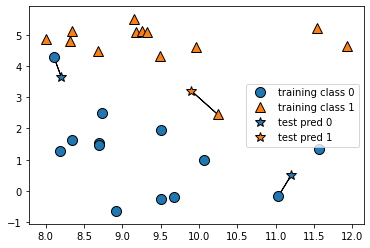

In [13]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

instead of just considering one Nearest Neihbour. We could consider 3. the nearest neihbours will belong to one of 2 classes. The classification of the new point is that of its most common 3 nearest neighbours. see an example below

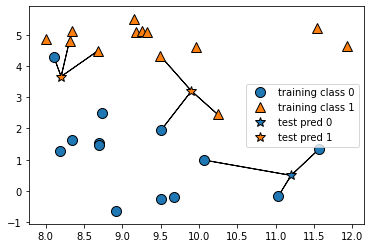

In [15]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

The above examples consider binary classification however this is possible as a multi classification problem. We can show this below. 
First split the data into a training and test set so we can evaluate gernerlization. 
 

In [16]:
from sklearn.model_selection import train_test_split #import training and test data from make_forge dataset
X, y = mglearn.datasets.make_forge() #Split the test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [20]:
# import the sklearn.neighbours
from sklearn.neighbors import KNeighborsClassifier
# Instantiate te KNeighborsClassifier with 3 neighbors
clf = KNeighborsClassifier(n_neighbors=3)

In [21]:
clf.fit(X_train, y_train) # fit the model to the training set, storing the data to compute p predicitions 

#make the predictions on the test set.
print("Test set predicition:", clf.predict(X_test))

Test set predicition: [1 0 1 0 1 0 0]


to evaluate how well this model scores we can call the score method with the test data and labels 

In [22]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test,y_test)))

Test set accuracy: 0.86
